In [2]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import jax
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

#from mcjax.proba.dist import Dist
from mcjax.proba.var_gaussian import MixtureDiagGaussian
from mcjax.util.plot_2d import evaluate_on_grid_2d


In [3]:
# initialize PRNG
key = jr.key(0)

In [4]:
# Initialize the mixture
dim = 2
K = 30
key = jr.PRNGKey(0)

mixture = MixtureDiagGaussian(dim=dim, num_components=K, log_std_init=jnp.array([0.5, 0.5]))
params = mixture.init_params(key)
# logdensity = lambda x: mixture.log_q(params, x)
def logdensity(x):
    return mixture.log_q(params, x)
logdensity_batch = jax.vmap(logdensity)


In [5]:
# extract the mean parameters
mus = params.mus

In [6]:
# 2. Generate samples
key, subkey = jr.split(key)
n_samples = 10_000
samples = mixture.sample(params, subkey, n_samples=n_samples)

(-5.0, 5.0)

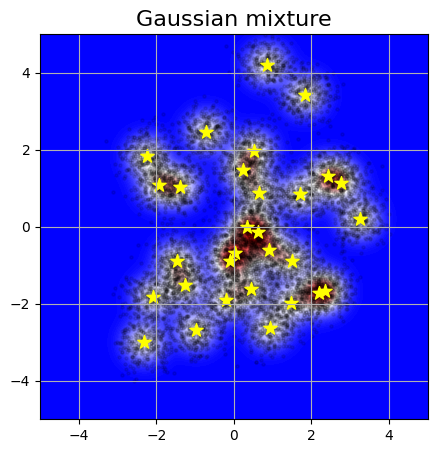

In [7]:
xmin, xmax = -5, 5
ymin, ymax = -5, 5
X, Y, Z = evaluate_on_grid_2d(
    func_batch=logdensity_batch,
    xlim=(xmin, xmax),
    ylim=(ymin, ymax),
    Nx=500,
    Ny=500
)

# plot the logpdf
plt.figure(figsize=(5, 5))
plt.contourf(X, Y, jnp.exp(Z), 100, cmap='bwr', origin='lower')
plt.grid()
plt.title('Gaussian mixture', fontsize=16)

# plot the samples
samples_np = jax.device_get(samples)
plt.scatter(samples_np[:, 0], samples_np[:, 1], alpha=0.1, color='black', s=5)

# plot the mixture means
plt.scatter(mus[:, 0], mus[:, 1], alpha=1., color='yellow', s=100, marker='*', label='mixture means')

# set the limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)